In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## Import the Gini Index

In [4]:
Gini = pd.read_csv('ACSDT5Y2021.B19083-Data.csv',skiprows=1)
Gini = Gini[['Geography','Geographic Area Name','Estimate!!Gini Index']]
Gini = Gini.rename(columns={'Geography':'GEOID','Estimate!!Gini Index':'Gini Index'})
Gini['Gini Index'] = Gini['Gini Index'].astype(str).str.replace('-', '')
Gini = Gini[Gini['Gini Index'] != ""]
Gini['Gini Index'] = Gini['Gini Index'].astype(float)
Gini['GEOID'] = Gini['GEOID'].str[-11:]
Gini.info()
Gini

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 241
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GEOID                 240 non-null    object 
 1   Geographic Area Name  240 non-null    object 
 2   Gini Index            240 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.5+ KB


,GEOID,Geographic Area Name,Gini Index
0,06075010101,"Census Tract 101.01, San Francisco County, Cal...",0.5204
1,06075010102,"Census Tract 101.02, San Francisco County, Cal...",0.5980
2,06075010201,"Census Tract 102.01, San Francisco County, Cal...",0.4909
3,06075010202,"Census Tract 102.02, San Francisco County, Cal...",0.5112
4,06075010300,"Census Tract 103, San Francisco County, Califo...",0.4603
...,...,...,...
235,06075061508,"Census Tract 615.08, San Francisco County, Cal...",0.4460
237,06075980300,"Census Tract 9803, San Francisco County, Calif...",0.2405
239,06075980501,"Census Tract 9805.01, San Francisco County, Ca...",0.1056
240,06075980600,"Census Tract 9806, San Francisco County, Calif...",0.4415


## Import the Race table

In [5]:
race = pd.read_csv('nhgis0016_ds254_20215_tract.csv',encoding='ISO-8859-1')
race = race[['GEO_ID','AON5E001','AON5E002','AON5E003','AON5E005','AON5E004','AON5E006']]
race = race.rename(columns={'AON5E001':'Total','AON5E002':'White_alone','AON5E003':'Black','AON5E005':'Asian','AON5E004':'American_Indian','AON5E006':'Native_Hawaiian'})
race['GEO_ID'] = race['GEO_ID'].str[-11:]
race.info()
race

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85395 entries, 0 to 85394
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GEO_ID           85395 non-null  object
 1   Total            85395 non-null  int64 
 2   White_alone      85395 non-null  int64 
 3   Black            85395 non-null  int64 
 4   Asian            85395 non-null  int64 
 5   American_Indian  85395 non-null  int64 
 6   Native_Hawaiian  85395 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 4.6+ MB


,GEO_ID,Total,White_alone,Black,Asian,American_Indian,Native_Hawaiian
0,01001020100,1791,1502,171,38,0,0
1,01001020200,2010,785,1088,0,0,0
2,01001020300,3577,2433,983,26,0,0
3,01001020400,3802,3410,251,14,18,0
4,01001020501,4381,3323,976,28,0,0
...,...,...,...,...,...,...,...
85390,72153750501,4757,3512,70,0,0,0
85391,72153750502,2871,1911,217,0,35,0
85392,72153750503,2010,1490,21,0,0,0
85393,72153750601,4927,3197,442,0,0,0


## Merge Race and Gini into together

In [6]:
race_gini = pd.merge(Gini,race,left_on='GEOID',right_on='GEO_ID',how='left')
race_gini = race_gini.drop('GEO_ID',axis=1)
race_gini.info()
race_gini

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GEOID                 240 non-null    object 
 1   Geographic Area Name  240 non-null    object 
 2   Gini Index            240 non-null    float64
 3   Total                 240 non-null    int64  
 4   White_alone           240 non-null    int64  
 5   Black                 240 non-null    int64  
 6   Asian                 240 non-null    int64  
 7   American_Indian       240 non-null    int64  
 8   Native_Hawaiian       240 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 17.0+ KB


,GEOID,Geographic Area Name,Gini Index,Total,White_alone,Black,Asian,American_Indian,Native_Hawaiian
0,06075010101,"Census Tract 101.01, San Francisco County, Cal...",0.5204,2118,742,95,1021,59,50
1,06075010102,"Census Tract 101.02, San Francisco County, Cal...",0.5980,1783,402,300,814,0,0
2,06075010201,"Census Tract 102.01, San Francisco County, Cal...",0.4909,2499,1905,201,168,0,0
3,06075010202,"Census Tract 102.02, San Francisco County, Cal...",0.5112,1891,1441,53,223,0,17
4,06075010300,"Census Tract 103, San Francisco County, Califo...",0.4603,3996,2744,0,1049,91,0
...,...,...,...,...,...,...,...,...,...
235,06075061508,"Census Tract 615.08, San Francisco County, Cal...",0.4460,2006,1013,60,818,0,0
236,06075980300,"Census Tract 9803, San Francisco County, Calif...",0.2405,25,14,0,5,0,0
237,06075980501,"Census Tract 9805.01, San Francisco County, Ca...",0.1056,104,0,0,104,0,0
238,06075980600,"Census Tract 9806, San Francisco County, Calif...",0.4415,970,99,286,317,44,0


<font color='#ED944B ' size=5>Shannon-Weiner Diversity Index</font>  
<font color='red'><u>Shannon-Weiner多样性指数的公式为：</u></font>
$$
H' = - \sum_{i=1}^{s} p_i \ln(p_i)
$$

其中：
- $ p_i $：代表物种i的相对丰度，即物种i的个体数除以所有物种的总个体数。
- $ s $：表示物种的总数。
- $ ln $：是自然对数。

<font color='red'><u>直观理解</u></font>

1. **物种丰富度**：简单地说，就是物种的数量。更多的物种意味着多样性更高。
2. **均匀度**：描述每种物种的个体如何分布。如果每种物种的个体数都很相似，则均匀度高；如果某些物种的个体数远远超过其他物种，则均匀度低。

当我们谈论**Shannon-Weiner多样性指数**（或简称为Shannon多样性指数），我们实际上在讨论一个经常用于量化生态系统中物种多样性的指标。它基于信息论中的Shannon熵，并在生态学中找到了应用。Shannon-Weiner多样性指数结合了这两方面的信息。较高的Shannon值意味着既有高的物种丰富度又有高的均匀度。而较低的值可能是由于物种丰富度低、均匀度低或两者均低。

## Compute the Racial Diversity

In [7]:
# Calculate the "Shannon-Weiner Diversity Index"
def shannon_diversity(row):
    # 提取各种族人数，并除以总人数得到比例
    proportions = [row[race] / row['Total'] for race in ['White_alone', 'Black', 'Asian', 'American_Indian', 'Native_Hawaiian'] if row[race] > 0]
    # 计算多样性指数
    return -sum(p * np.log(p) for p in proportions)

race_gini['Shannon_Diversity'] = race_gini.apply(shannon_diversity, axis=1)
race_gini

,GEOID,Geographic Area Name,Gini Index,Total,White_alone,Black,Asian,American_Indian,Native_Hawaiian,Shannon_Diversity
0,06075010101,"Census Tract 101.01, San Francisco County, Cal...",0.5204,2118,742,95,1021,59,50,1.046631
1,06075010102,"Census Tract 101.02, San Francisco County, Cal...",0.5980,1783,402,300,814,0,0,0.993691
2,06075010201,"Census Tract 102.01, San Francisco County, Cal...",0.4909,2499,1905,201,168,0,0,0.591104
3,06075010202,"Census Tract 102.02, San Francisco County, Cal...",0.5112,1891,1441,53,223,0,17,0.601731
4,06075010300,"Census Tract 103, San Francisco County, Califo...",0.4603,3996,2744,0,1049,91,0,0.695340
...,...,...,...,...,...,...,...,...,...,...
235,06075061508,"Census Tract 615.08, San Francisco County, Cal...",0.4460,2006,1013,60,818,0,0,0.815781
236,06075980300,"Census Tract 9803, San Francisco County, Calif...",0.2405,25,14,0,5,0,0,0.646586
237,06075980501,"Census Tract 9805.01, San Francisco County, Ca...",0.1056,104,0,0,104,0,0,-0.000000
238,06075980600,"Census Tract 9806, San Francisco County, Calif...",0.4415,970,99,286,317,44,0,1.098821


<font color='#ED944B ' size=5>Combined Metric Calculation</font>  
<font color='red'><u>Combined Metric Calculation的公式为：</u></font>使用标准化与指示器的乘积：我们首先要对每一个指标进行标准化处理（标准化是一个将数据转化为均值为0、标准差为1的过程）,然后我们将它与指示器相乘，确保筛选地区为种族多样性高，经济差异大，其数学公式为:
$${Combined_Metric}_{i} = {IndicatorMetric}_{i}\times\left( \frac{\text{Gini Index}_{i} - \overline{\text{Gini Index}}}{\sigma_{\text{Gini Index}}} \right) \times \left( \frac{\text{Shannon Diversity}_{i} - \overline{\text{Shannon Diversity}}}{\sigma_{\text{Shannon Diversity}}} \right) $$  
$$\text{IndicatorMetric}_{i} = I\left( Gini\ Index_i > \overline{Gini\ Index} \right) \times I\left( Shannon\ Diversity_i > \overline{Shannon\ Diversity} \right)$$


其中:

- $\text{Combined\_Metric}_{i}$ 是第i个观测的组合指标。
- $\text{Gini Index}_{i}$ and $\text{Shannon Diversity}_{i}$ 分别是第i个观测的Gini Index和Shannon Diversity。
- $\overline{\text{Gini Index}}$ and $\overline{\text{Shannon Diversity}}$ r是Gini Index和Shannon Diversity的样本均值。
- $\sigma_{\text{Gini Index}}$ and $\sigma_{\text{Shannon Diversity}}$ 是Gini Index和Shannon Diversity的样本标准差。
- $\text{IndicatorMetric}_i $: 我们可以为每个指标创建一个指示器变量，该变量在指标高于其均值时为1，否则为0。然后，将这两个指示器相乘，从而只有当两个指标都高于其均值时，结果才为1。

在研究地区的经济和种族差异时，单纯地看Gini Index（代表经济差异）或Shannon Diversity（代表种族多样性）可能无法完整地捕捉到一个地区的多样性情境。因此，我们引入一个新的组合指标：Combined Metric。这个组合指标（Combined Metric）是基于Gini Index和Shannon Diversity两个指标的标准化值的乘积。具体来说，这个组合指标可以给我们提供以下信息：
Combined Metric旨在捕捉那些在经济差异和种族多样性上都高于平均水平的地区。<u>这是通过计算一个指示器变量来完成的</u>，该变量为1当一个地区的Gini Index和Shannon Diversity都高于其各自的均值，否则为0。当这两个指标都高于其均值时，这意味着该地区既有较高的经济差异，又有较高的种族多样性。因此，一个较高的Combined Metric值不仅代表一个地区的经济差异大，还代表种族多样性高。

In [8]:
# the mean and standard deviation of the “Gini Index” and “Shannon Diversity”
mean_gini = race_gini['Gini Index'].mean()
std_gini = race_gini['Gini Index'].std()

mean_shannon = race_gini['Shannon_Diversity'].mean() 
std_shannon = race_gini['Shannon_Diversity'].std()

# indicator metrics
race_gini['Indicator_Gini'] = (race_gini['Gini Index'] > mean_gini).astype(int)
race_gini['Indicator_Shannon'] = (race_gini['Shannon_Diversity'] > mean_shannon).astype(int)
race_gini['Indicator_Metric'] = race_gini['Indicator_Gini'] * race_gini['Indicator_Shannon']

# Combined_Metric
race_gini['Combined_Metric'] = race_gini['Indicator_Metric'] * \
                                ((race_gini['Gini Index'] - mean_gini) / std_gini) * \
                                ((race_gini['Shannon_Diversity'] - mean_shannon) / std_shannon)

# Delete intermediate steps
# race_gini.drop(columns=['Indicator_Gini', 'Indicator_Shannon', 'Indicator_Metric'], inplace=True)
race_gini

,GEOID,Geographic Area Name,Gini Index,Total,White_alone,Black,Asian,American_Indian,Native_Hawaiian,Shannon_Diversity,Indicator_Gini,Indicator_Shannon,Indicator_Metric,Combined_Metric
0,06075010101,"Census Tract 101.01, San Francisco County, Cal...",0.5204,2118,742,95,1021,59,50,1.046631,1,1,1,1.186999
1,06075010102,"Census Tract 101.02, San Francisco County, Cal...",0.5980,1783,402,300,814,0,0,0.993691,1,1,1,2.490968
2,06075010201,"Census Tract 102.01, San Francisco County, Cal...",0.4909,2499,1905,201,168,0,0,0.591104,1,0,0,-0.000000
3,06075010202,"Census Tract 102.02, San Francisco County, Cal...",0.5112,1891,1441,53,223,0,17,0.601731,1,0,0,-0.000000
4,06075010300,"Census Tract 103, San Francisco County, Califo...",0.4603,3996,2744,0,1049,91,0,0.695340,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,06075061508,"Census Tract 615.08, San Francisco County, Cal...",0.4460,2006,1013,60,818,0,0,0.815781,0,1,0,-0.000000
236,06075980300,"Census Tract 9803, San Francisco County, Calif...",0.2405,25,14,0,5,0,0,0.646586,0,0,0,0.000000
237,06075980501,"Census Tract 9805.01, San Francisco County, Ca...",0.1056,104,0,0,104,0,0,-0.000000,0,0,0,0.000000
238,06075980600,"Census Tract 9806, San Francisco County, Calif...",0.4415,970,99,286,317,44,0,1.098821,0,1,0,-0.000000


## Input the Boundary file

In [9]:
Sanfran_Boundary = gpd.read_file('tl_2021_06_tract.zip')
Sanfran_Boundary = Sanfran_Boundary[['GEOID','geometry']]
Sanfran_Boundary.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9129 entries, 0 to 9128
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEOID     9129 non-null   object  
 1   geometry  9129 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 142.8+ KB


<Axes: >

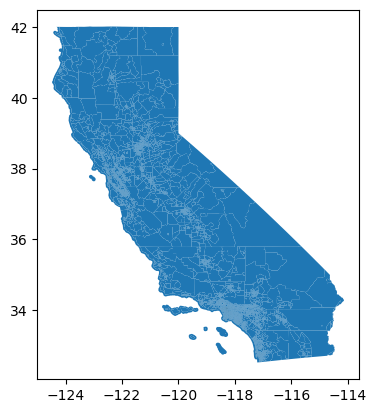

In [10]:
Sanfran_Boundary.plot()

In [11]:
Sanfran_Boundary.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

## Combine boundary into race_gini together

In [12]:
combine_race_gini = pd.merge(race_gini,Sanfran_Boundary,left_on='GEOID',right_on='GEOID',how='left')
combine_race_gini = gpd.GeoDataFrame(combine_race_gini, geometry='geometry', crs="EPSG:4269")
combine_race_gini.info()
combine_race_gini

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   GEOID                 240 non-null    object  
 1   Geographic Area Name  240 non-null    object  
 2   Gini Index            240 non-null    float64 
 3   Total                 240 non-null    int64   
 4   White_alone           240 non-null    int64   
 5   Black                 240 non-null    int64   
 6   Asian                 240 non-null    int64   
 7   American_Indian       240 non-null    int64   
 8   Native_Hawaiian       240 non-null    int64   
 9   Shannon_Diversity     240 non-null    float64 
 10  Indicator_Gini        240 non-null    int32   
 11  Indicator_Shannon     240 non-null    int32   
 12  Indicator_Metric      240 non-null    int32   
 13  Combined_Metric       240 non-null    float64 
 14  geometry              240 non-null    geometry
dty

,GEOID,Geographic Area Name,Gini Index,Total,White_alone,Black,Asian,American_Indian,Native_Hawaiian,Shannon_Diversity,Indicator_Gini,Indicator_Shannon,Indicator_Metric,Combined_Metric,geometry
0,06075010101,"Census Tract 101.01, San Francisco County, Cal...",0.5204,2118,742,95,1021,59,50,1.046631,1,1,1,1.186999,"POLYGON ((-122.42108 37.81289, -122.42018 37.8..."
1,06075010102,"Census Tract 101.02, San Francisco County, Cal...",0.5980,1783,402,300,814,0,0,0.993691,1,1,1,2.490968,"POLYGON ((-122.41689 37.80521, -122.41524 37.8..."
2,06075010201,"Census Tract 102.01, San Francisco County, Cal...",0.4909,2499,1905,201,168,0,0,0.591104,1,0,0,-0.000000,"POLYGON ((-122.42484 37.80227, -122.42465 37.8..."
3,06075010202,"Census Tract 102.02, San Francisco County, Cal...",0.5112,1891,1441,53,223,0,17,0.601731,1,0,0,-0.000000,"POLYGON ((-122.42685 37.80902, -122.42682 37.8..."
4,06075010300,"Census Tract 103, San Francisco County, Califo...",0.4603,3996,2744,0,1049,91,0,0.695340,0,0,0,0.000000,"POLYGON ((-122.41872 37.80593, -122.41838 37.8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,06075061508,"Census Tract 615.08, San Francisco County, Cal...",0.4460,2006,1013,60,818,0,0,0.815781,0,1,0,-0.000000,"POLYGON ((-122.39362 37.78308, -122.39284 37.7..."
236,06075980300,"Census Tract 9803, San Francisco County, Calif...",0.2405,25,14,0,5,0,0,0.646586,0,0,0,0.000000,"POLYGON ((-122.51726 37.77068, -122.51679 37.7..."
237,06075980501,"Census Tract 9805.01, San Francisco County, Ca...",0.1056,104,0,0,104,0,0,-0.000000,0,0,0,0.000000,"POLYGON ((-122.42722 37.71555, -122.42719 37.7..."
238,06075980600,"Census Tract 9806, San Francisco County, Calif...",0.4415,970,99,286,317,44,0,1.098821,0,1,0,-0.000000,"POLYGON ((-122.38694 37.72425, -122.38693 37.7..."


In [13]:
combine_race_gini.explore(column='Combined_Metric',cmap='OrRd',tiles='CartoDB positron')

## Cumulative Distribution

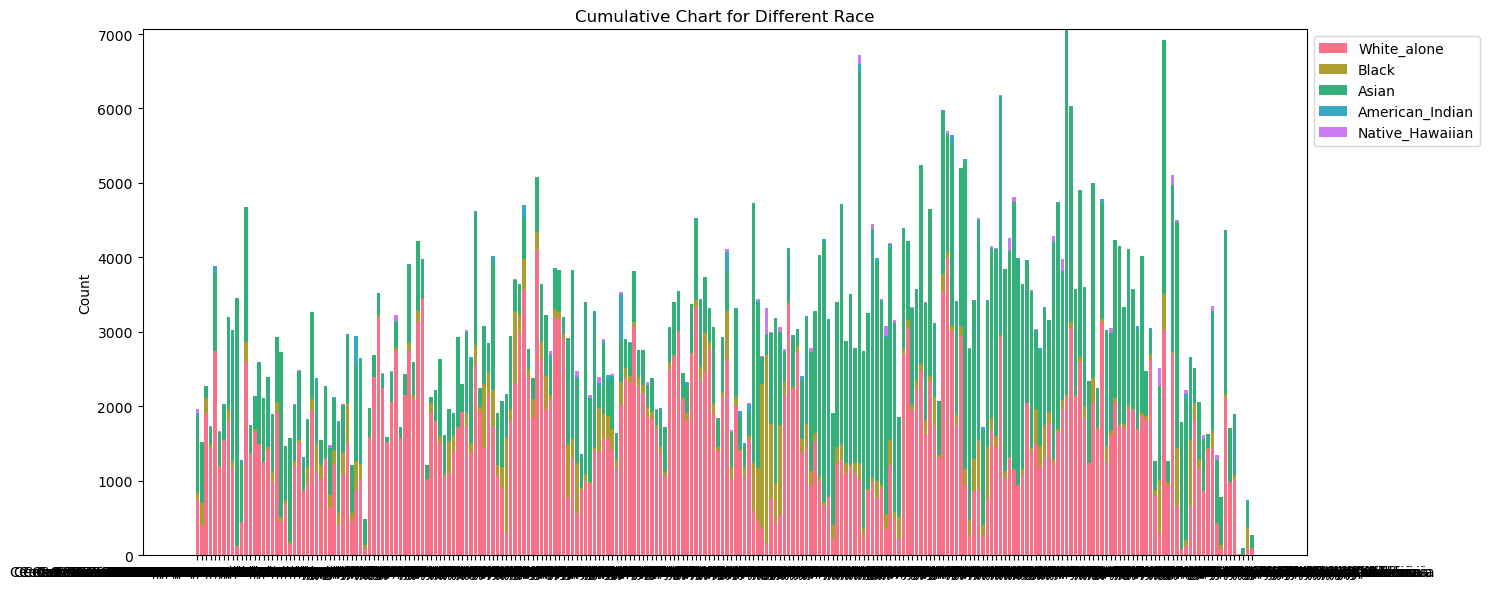

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to be plotted
columns_to_plot = ['White_alone', 'Black', 'Asian', 'American_Indian', 'Native_Hawaiian']

# Setting the "color_palette"
colors = sns.color_palette('husl', len(columns_to_plot))

# Initialize a graph and axes
plt.figure(figsize=(15, 6))

# Stacking Bar Charts Using a Cumulative Approach
bottom_data = [0] * combine_race_gini.shape[0]
for col, color in zip(columns_to_plot, colors):
    plt.bar(combine_race_gini['Geographic Area Name'], combine_race_gini[col], bottom=bottom_data, label=col, color=color)
    bottom_data += combine_race_gini[col].values

plt.ylabel('Count')
plt.title('Cumulative Chart for Different Race')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
# plt.savefig("Cumulative Chart for Different Race.png")

plt.show()

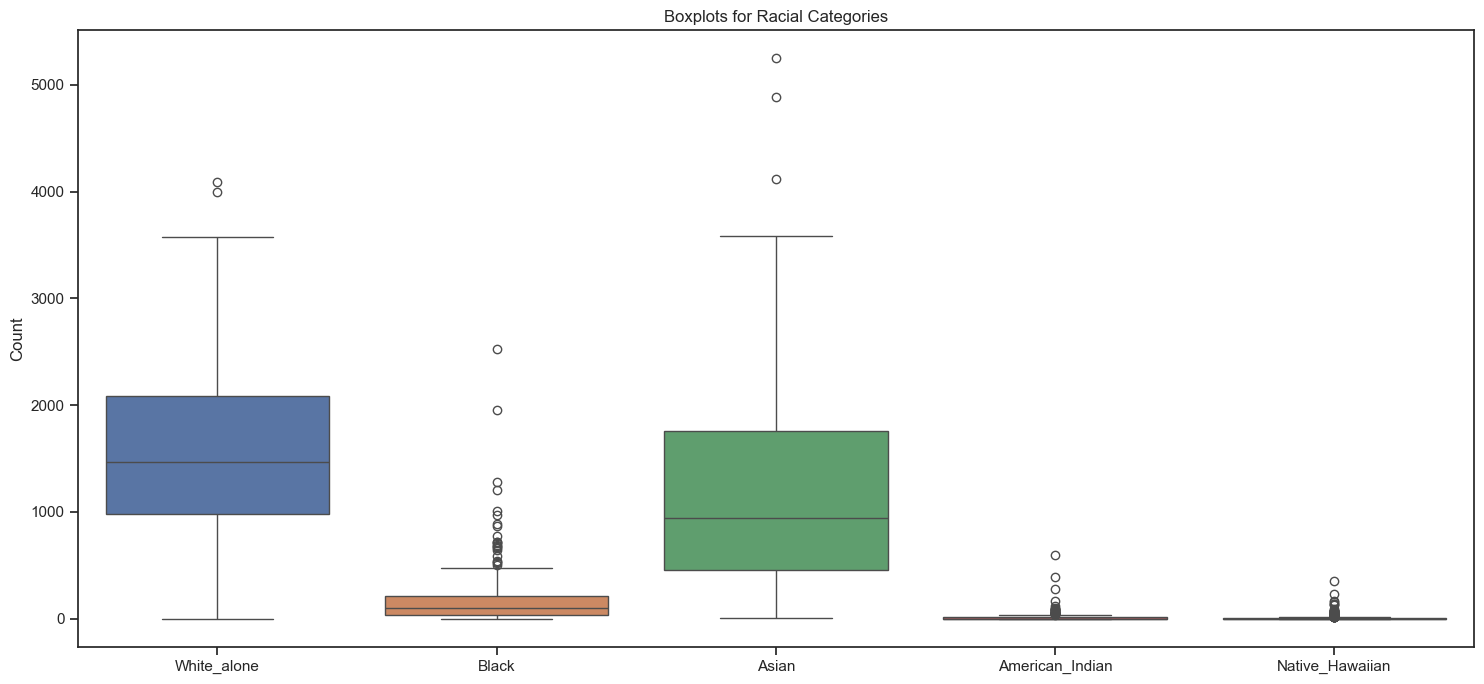

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置风格和大小
sns.set_theme(style="ticks")
plt.figure(figsize=(15, 7))

# 绘制箱型图
sns.boxplot(data=combine_race_gini[['White_alone', 'Black', 'Asian', 'American_Indian', 'Native_Hawaiian']])

# 设置标题
plt.title("Boxplots for Racial Categories")
plt.ylabel("Count")

plt.tight_layout()
# plt.savefig("Boxplots for Racial Categories.png")

plt.show()

## Hexbin plot with marginal distributions

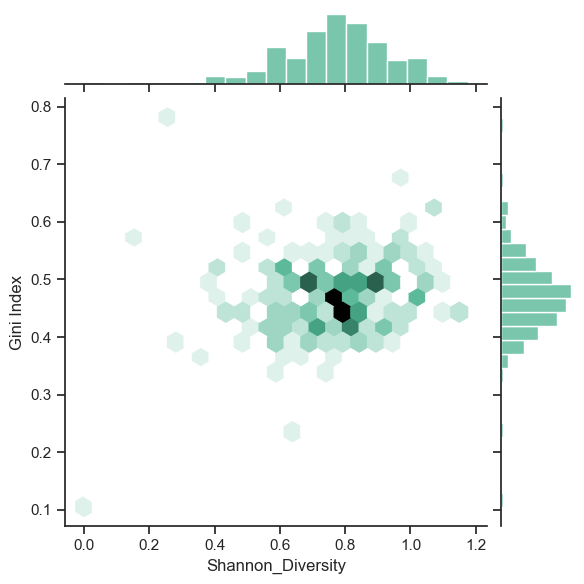

In [16]:
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks")

jointplot = sns.jointplot(x=combine_race_gini['Shannon_Diversity'], y=combine_race_gini['Gini Index'], kind="hex", color="#4CB391")
# jointplot.savefig("jointplot.png")

plt.show()

## Joint kernel density estimate

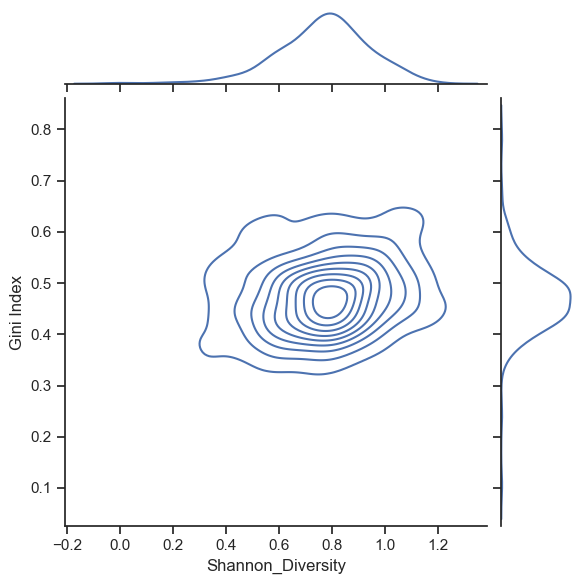

In [17]:
import seaborn as sns
sns.set_theme(style="ticks")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=combine_race_gini,
    x="Shannon_Diversity", y="Gini Index",
    kind="kde",
)
# g.savefig("KDE.png")

plt.show()

## Linear regression with marginal distributions

In [18]:
combine_race_gini[['Shannon_Diversity','Gini Index']].describe()

,Shannon_Diversity,Gini Index
count,240.000000,240.000000
mean,0.767073,0.471558
std,0.173459,0.066317
min,-0.000000,0.105600
25%,0.670711,0.430675
50%,0.784277,0.471950
75%,0.870621,0.505875
max,1.175094,0.780600


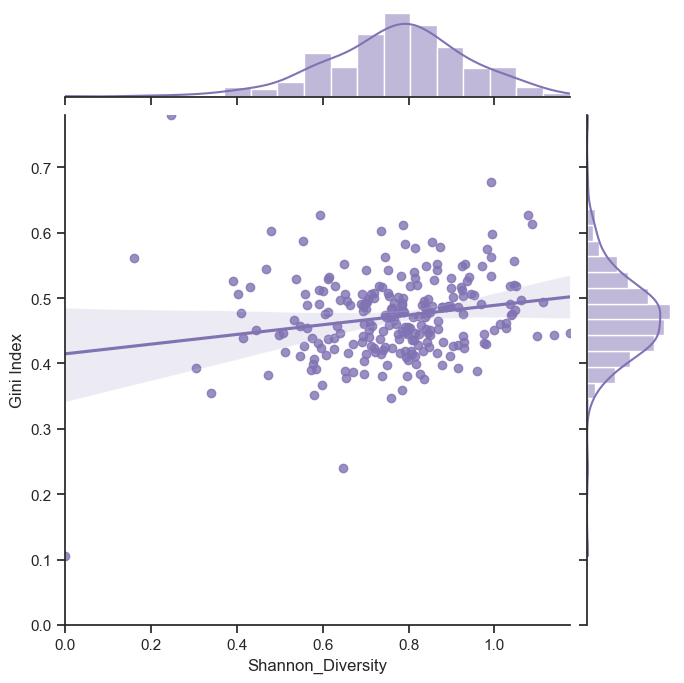

In [19]:
import seaborn as sns
sns.set_theme(style="ticks")

g = sns.jointplot(x="Shannon_Diversity", y="Gini Index", data=combine_race_gini,
                  kind="reg", truncate=False,
                  xlim=(0, 1.175094), ylim=(0, 0.780600),
                  color="m", height=7)

# g.savefig("Linear regression with marginal distributions.png")

plt.show()

## Scatterplot with size by Combined_Metic

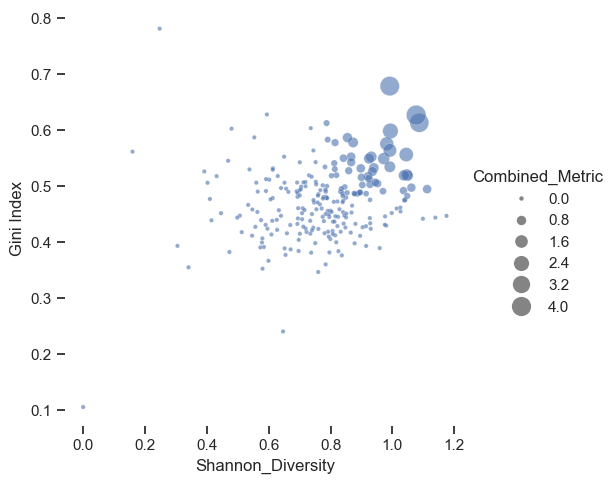

In [20]:
import seaborn as sns
sns.set_theme(style="ticks")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=combine_race_gini,
    x="Shannon_Diversity", y="Gini Index",
    size="Combined_Metric",
    palette=cmap, sizes=(10, 200),alpha=0.6
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

# g.savefig("Combined_Metic.png")

plt.show()

In [21]:
combine_race_gini.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   GEOID                 240 non-null    object  
 1   Geographic Area Name  240 non-null    object  
 2   Gini Index            240 non-null    float64 
 3   Total                 240 non-null    int64   
 4   White_alone           240 non-null    int64   
 5   Black                 240 non-null    int64   
 6   Asian                 240 non-null    int64   
 7   American_Indian       240 non-null    int64   
 8   Native_Hawaiian       240 non-null    int64   
 9   Shannon_Diversity     240 non-null    float64 
 10  Indicator_Gini        240 non-null    int32   
 11  Indicator_Shannon     240 non-null    int32   
 12  Indicator_Metric      240 non-null    int32   
 13  Combined_Metric       240 non-null    float64 
 14  geometry              240 non-null    geometry
dty